In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/credit-card/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

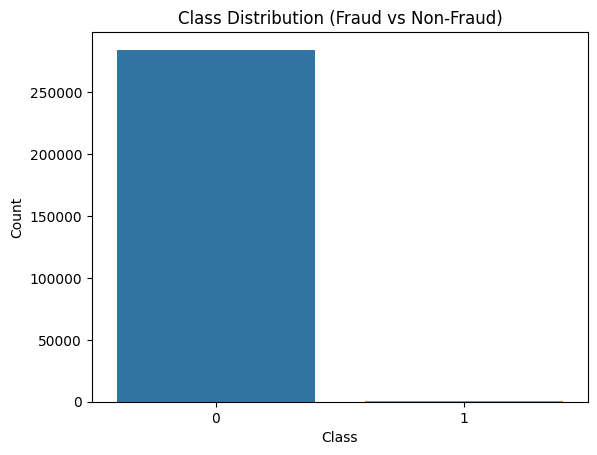

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
legit_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

legit_df.shape

(284315, 31)

In [9]:
fraud_df.shape

(492, 31)

In [10]:
legit_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
df.groupby('Class').mean().T

Class,0,1
Time,94838.202258,80746.806911
V1,0.008258,-4.771948
V2,-0.006271,3.623778
V3,0.012171,-7.033281
V4,-0.007860,4.542029
V5,0.005453,-3.151225
V6,0.002419,-1.397737
V7,0.009637,-5.568731
V8,-0.000987,0.570636
V9,0.004467,-2.581123


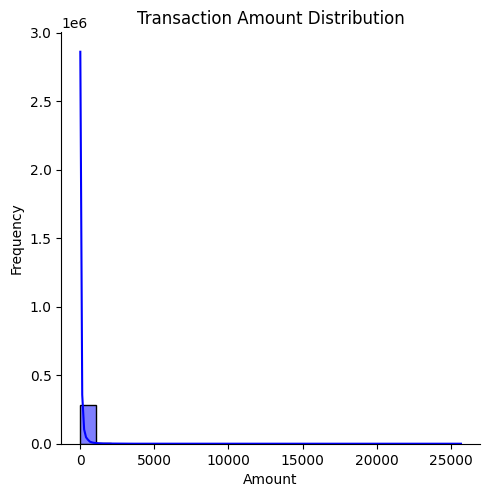

In [13]:
# Distribution of 'Amount' feature
sns.displot(df['Amount'], bins=25, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

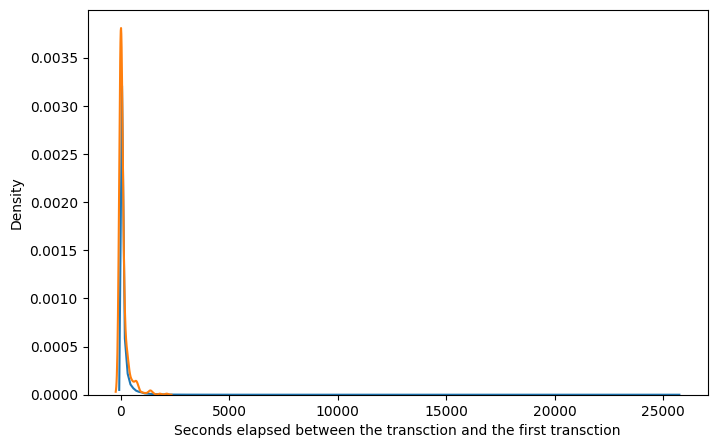

In [14]:
plt.figure(figsize=(8,5))
ax = sns.distplot(legit_df['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(fraud_df['Amount'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

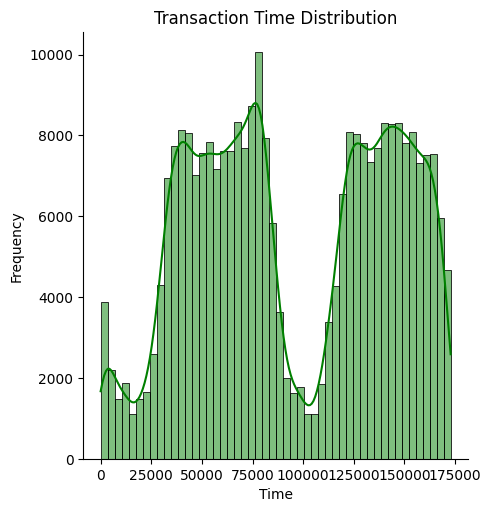

In [15]:
# Distribution of 'Time' feature
sns.displot(df['Time'], bins=50, kde=True, color='green')
plt.title('Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

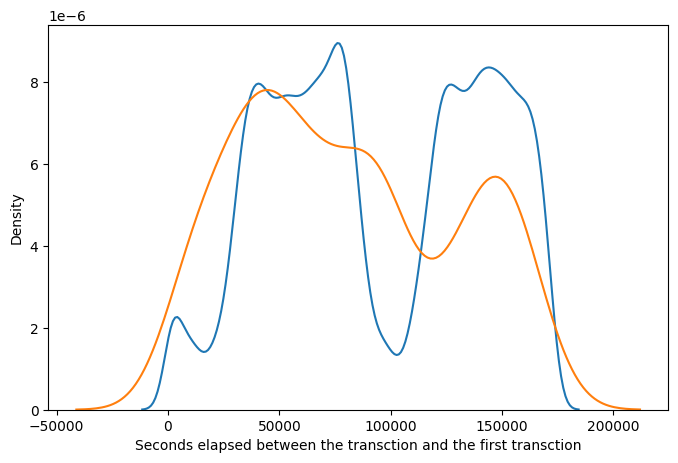

In [16]:
plt.figure(figsize=(8,5))
ax = sns.distplot(legit_df['Time'],label='fraudulent',hist=False)
ax = sns.distplot(fraud_df['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [17]:
df.drop('Time', axis=1, inplace=True)

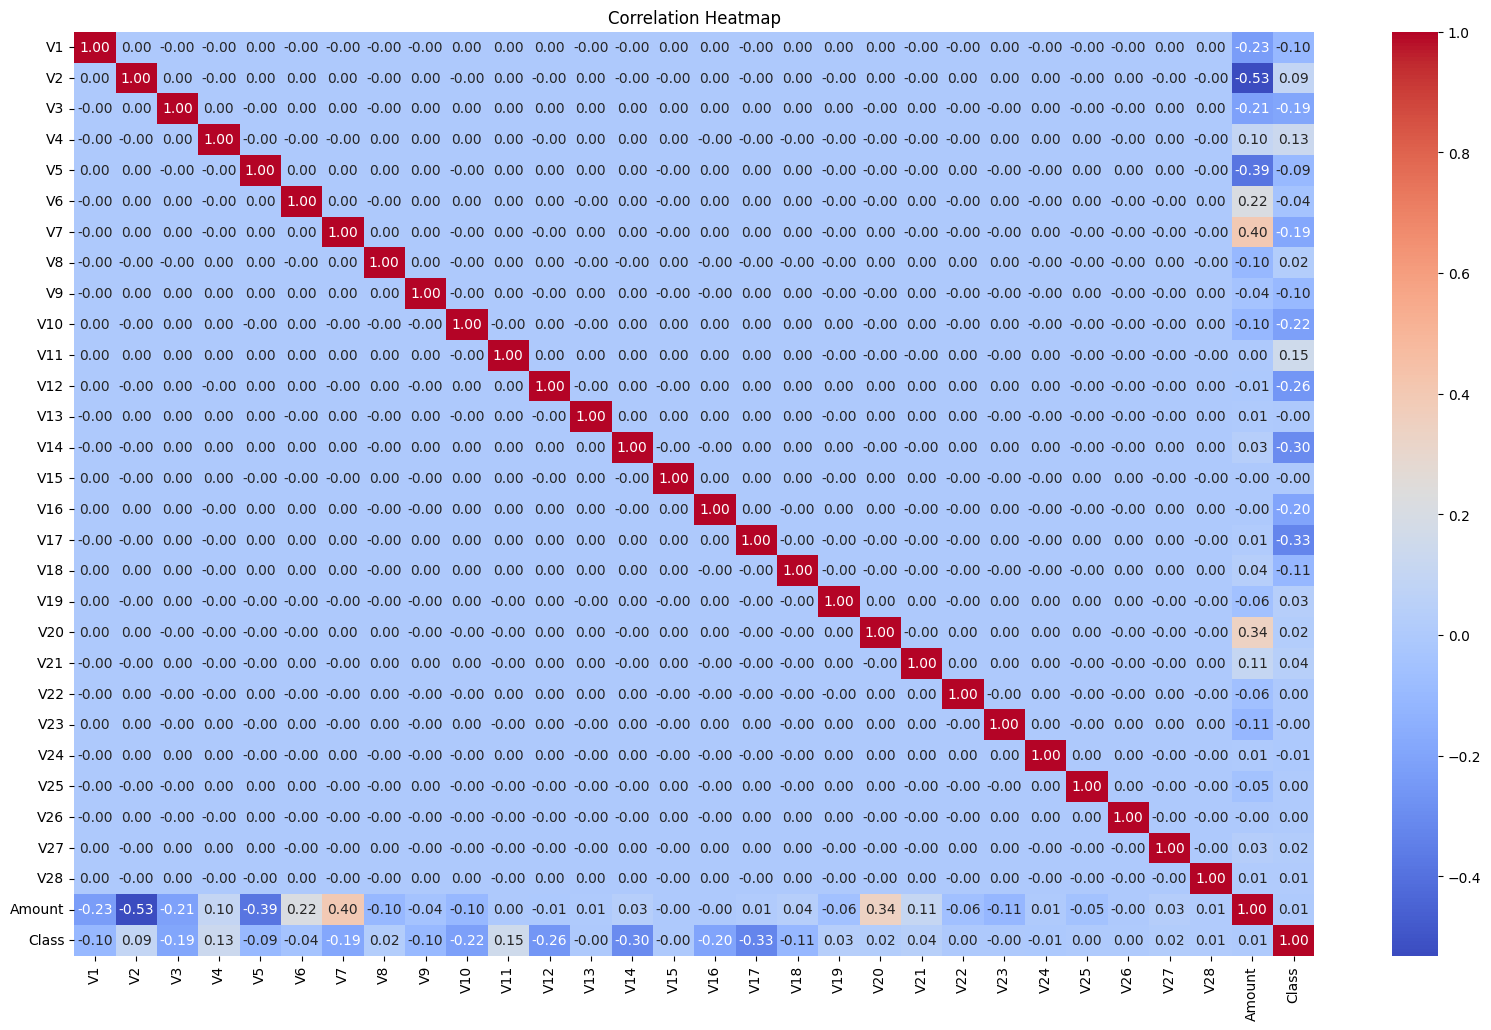

In [18]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

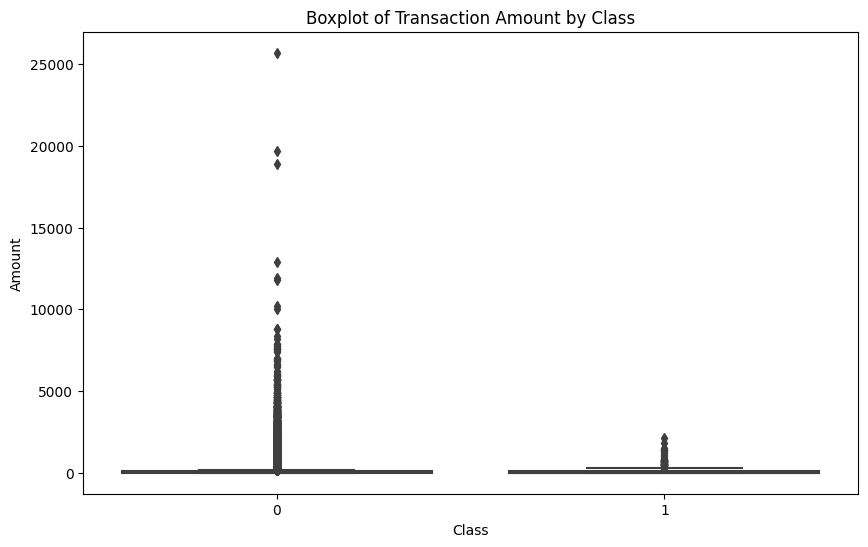

In [19]:
# Visualize potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Boxplot of Transaction Amount by Class')
plt.show()

In [20]:
# Calculate outliers for each numeric feature
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('Class')

outliers_by_feature = {}
for col in numeric_cols:
   Q1 = df[col].quantile(0.25)
   Q3 = df[col].quantile(0.75) 
   IQR = Q3 - Q1
   
   outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
   outliers_by_feature[col] = outliers.sum()
   
   print(f'Outliers in {col}: {outliers.sum()}')

Outliers in V1: 7062
Outliers in V2: 13526
Outliers in V3: 3363
Outliers in V4: 11148
Outliers in V5: 12295
Outliers in V6: 22965
Outliers in V7: 8948
Outliers in V8: 24134
Outliers in V9: 8283
Outliers in V10: 9496
Outliers in V11: 780
Outliers in V12: 15348
Outliers in V13: 3368
Outliers in V14: 14149
Outliers in V15: 2894
Outliers in V16: 8184
Outliers in V17: 7420
Outliers in V18: 7533
Outliers in V19: 10205
Outliers in V20: 27770
Outliers in V21: 14497
Outliers in V22: 1317
Outliers in V23: 18541
Outliers in V24: 4774
Outliers in V25: 5367
Outliers in V26: 5596
Outliers in V27: 39163
Outliers in V28: 30342
Outliers in Amount: 31904


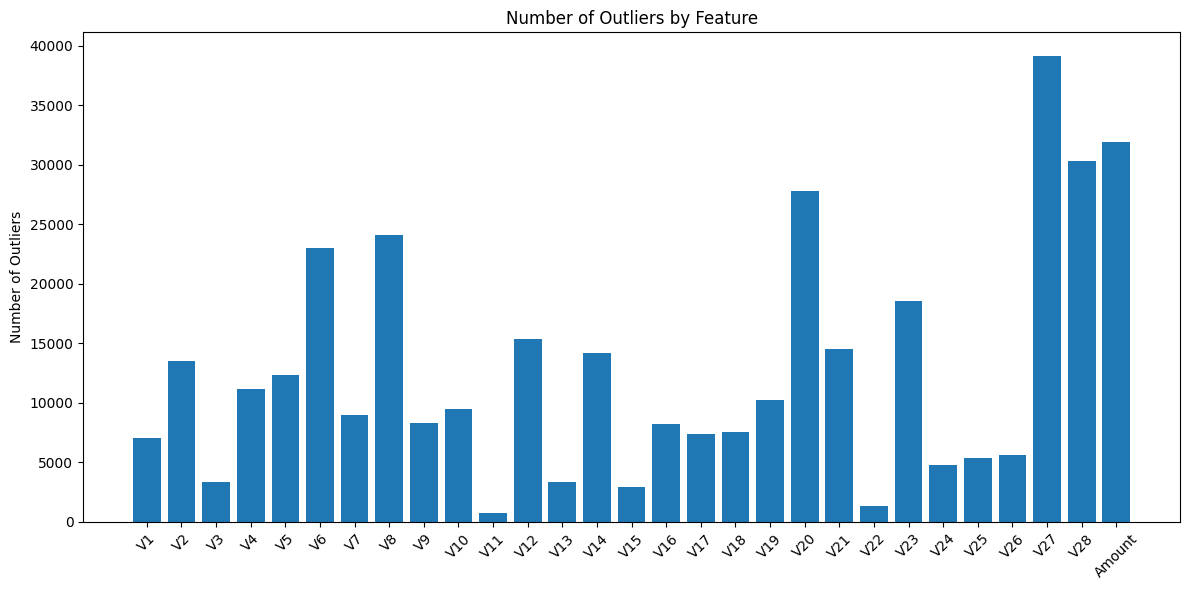

In [21]:
# Visualize outliers
plt.figure(figsize=(12,6))
plt.bar(outliers_by_feature.keys(), outliers_by_feature.values())
plt.xticks(rotation=45)
plt.title('Number of Outliers by Feature')
plt.ylabel('Number of Outliers')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,0.185689,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,-0.074854,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,0.303796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,0.038374,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,0.855099,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


In [23]:
# Random State
random_state = 1

In [24]:
X = df.drop('Class', axis=1)
y = df['Class']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

# Split Data Shape 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [26]:
print("\nClass Distribution Before Resampling:")
print(pd.Series(y_train).value_counts())


Class Distribution Before Resampling:
Class
0    227451
1       394
Name: count, dtype: int64


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=random_state)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\nClass Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())


Class Distribution After Resampling:
Class
0    227451
1    227451
Name: count, dtype: int64


In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV

In [29]:
from sklearn.metrics import *
import pickle

all_metrics = {}

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, threshold=0.99):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

    # Optimal threshold (e.g., maximizing F1-Score)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal Threshold (Max F1-Score): {optimal_threshold:.4f}")

    metrics = {
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Optimal Threshold': optimal_threshold,
        'True Negatives': cm[0][0],
        'False Positives': cm[0][1],
        'False Negatives': cm[1][0],
        'True Positives': cm[1][1]
    }
    all_metrics[model_name] = metrics

    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    metrics_df = pd.DataFrame([metrics], index=[model_name])

    # Save the model
    model_path = f'{model_name.lower().replace(" ", "_")}_model.pkl'
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved at: {model_path}")

    return metrics_df.T

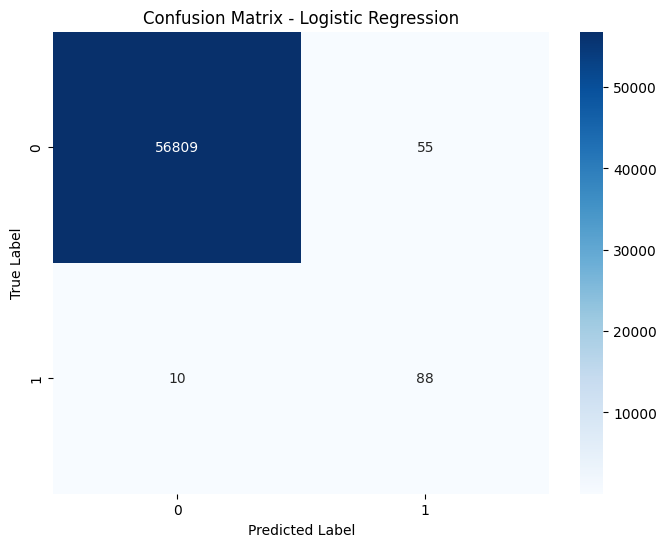

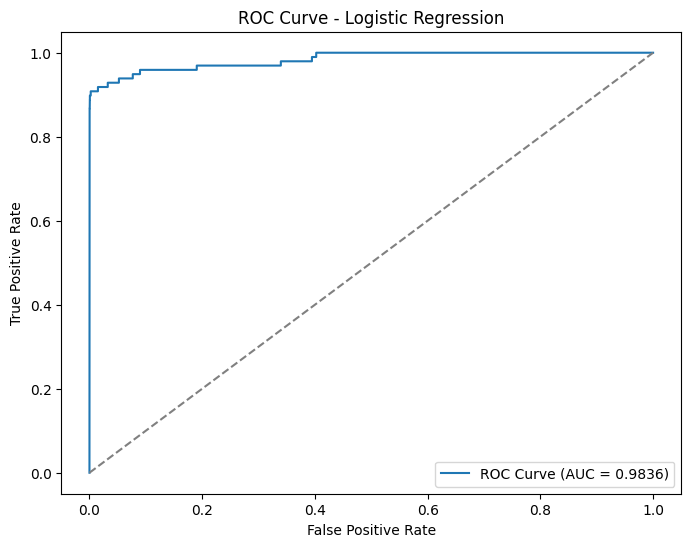

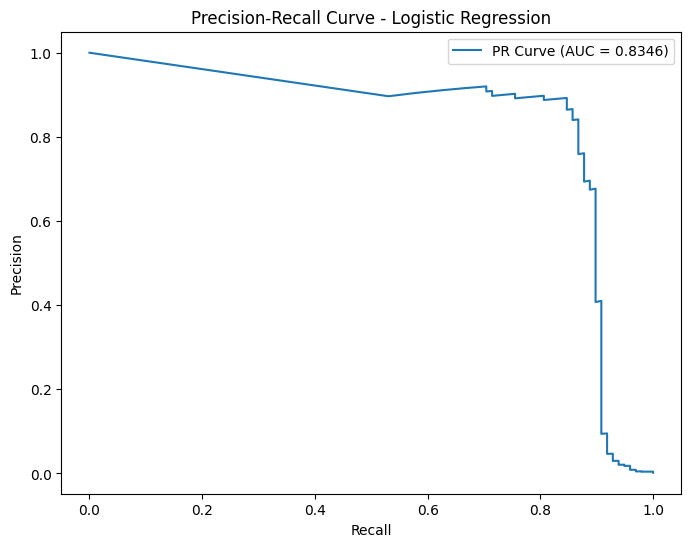

Optimal Threshold (Max F1-Score): 1.0000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.90      0.73        98

    accuracy                           1.00     56962
   macro avg       0.81      0.95      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Model saved at: logistic_regression_model.pkl


,Logistic Regression
Accuracy,0.998859
ROC-AUC,0.983626
Precision,0.615385
Recall,0.897959
F1-Score,0.730290
Optimal Threshold,1.000000
True Negatives,56809.000000
False Positives,55.000000
False Negatives,10.000000
True Positives,88.000000


In [30]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=random_state)
evaluate_model(logistic_model, X_resampled, y_resampled, X_test, y_test, "Logistic Regression")

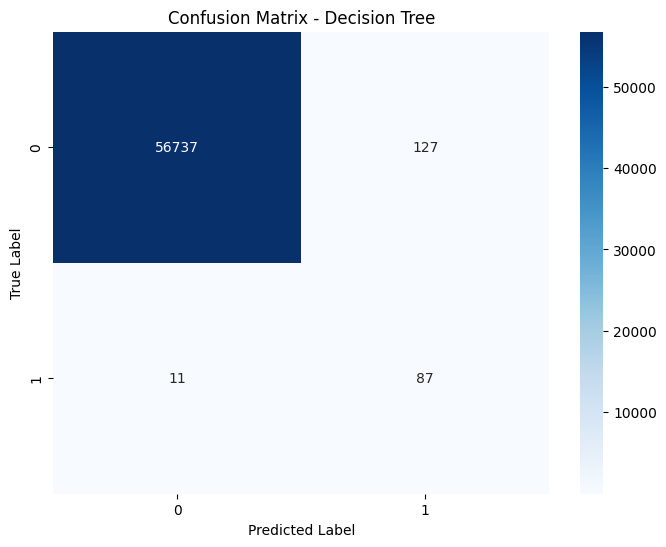

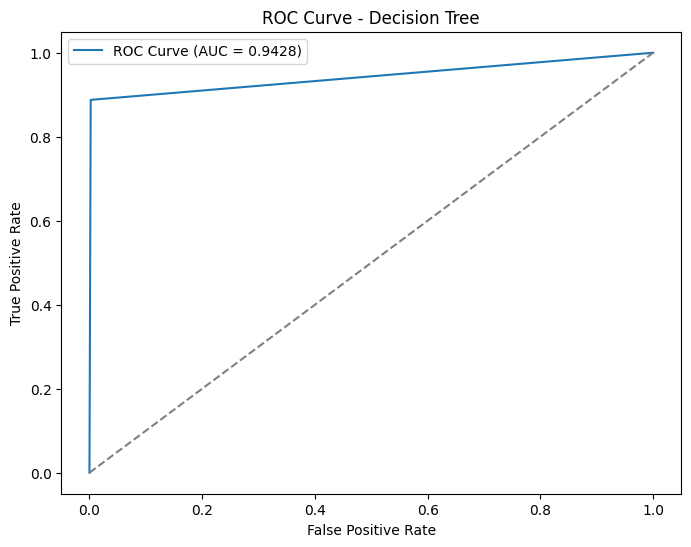

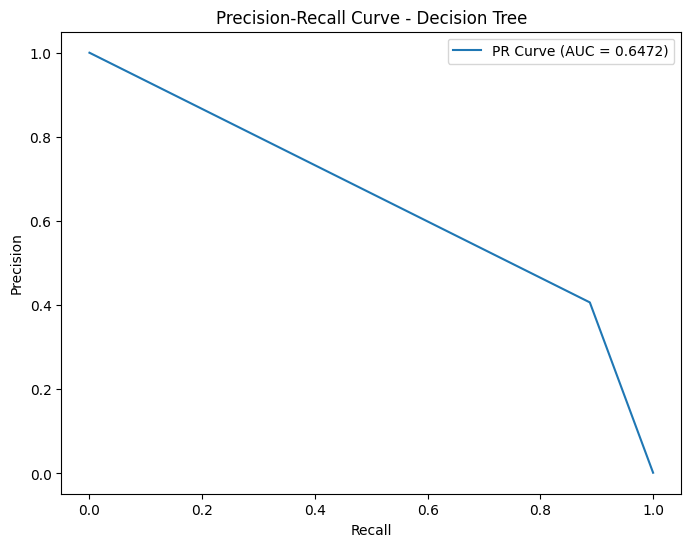

Optimal Threshold (Max F1-Score): 1.0000

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.89      0.56        98

    accuracy                           1.00     56962
   macro avg       0.70      0.94      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Model saved at: decision_tree_model.pkl


,Decision Tree
Accuracy,0.997577
ROC-AUC,0.942761
Precision,0.406542
Recall,0.887755
F1-Score,0.557692
Optimal Threshold,1.000000
True Negatives,56737.000000
False Positives,127.000000
False Negatives,11.000000
True Positives,87.000000


In [31]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=random_state)
evaluate_model(dt_model, X_resampled, y_resampled, X_test, y_test, "Decision Tree")

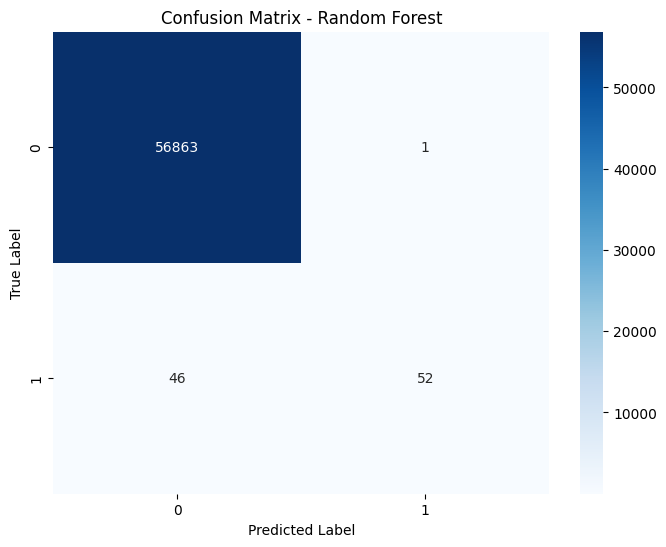

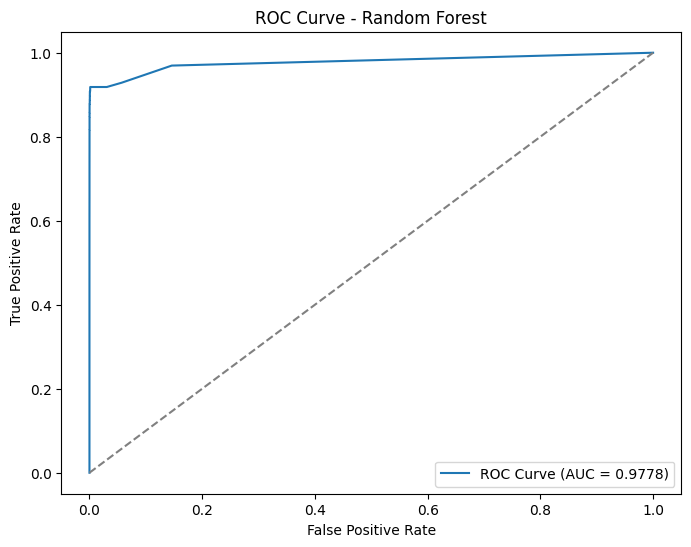

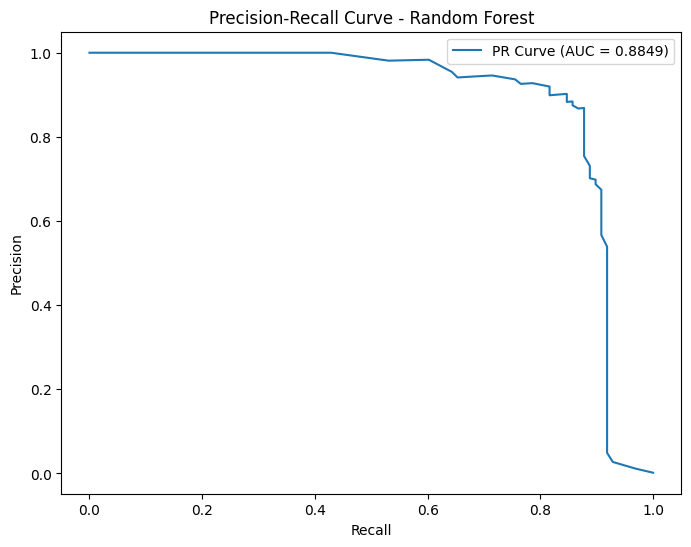

Optimal Threshold (Max F1-Score): 0.7500

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.53      0.69        98

    accuracy                           1.00     56962
   macro avg       0.99      0.77      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Model saved at: random_forest_model.pkl


,Random Forest
Accuracy,0.999175
ROC-AUC,0.977802
Precision,0.981132
Recall,0.530612
F1-Score,0.688742
Optimal Threshold,0.750000
True Negatives,56863.000000
False Positives,1.000000
False Negatives,46.000000
True Positives,52.000000


In [32]:
# Random Forest
rf_model = RandomForestClassifier(random_state=random_state)
evaluate_model(rf_model, X_resampled, y_resampled, X_test, y_test, "Random Forest")

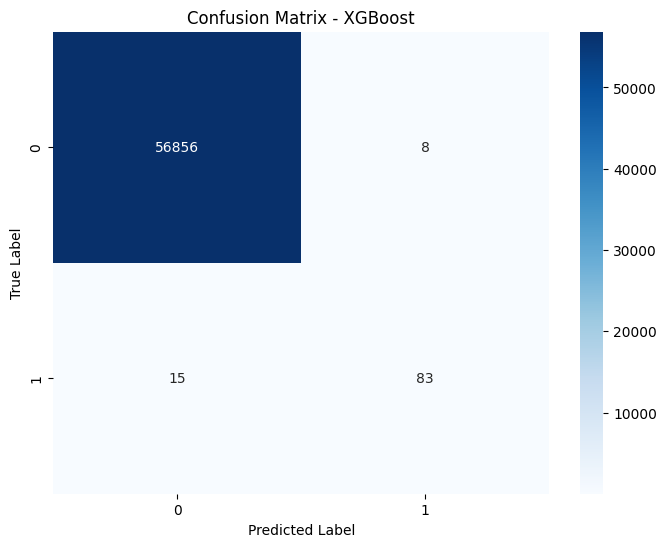

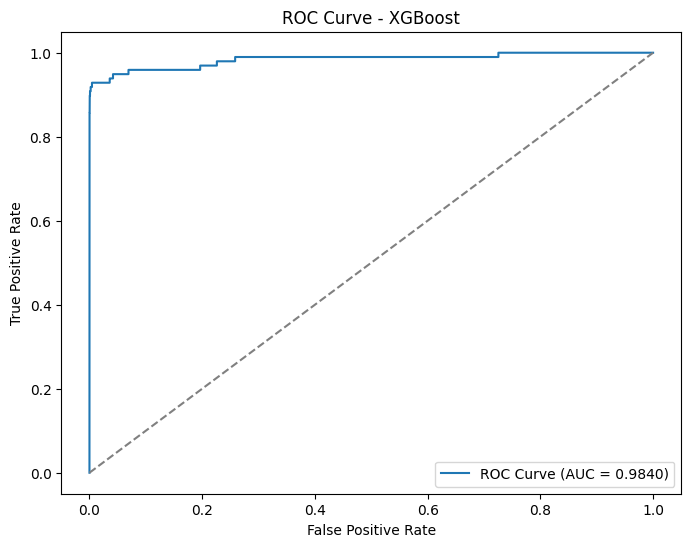

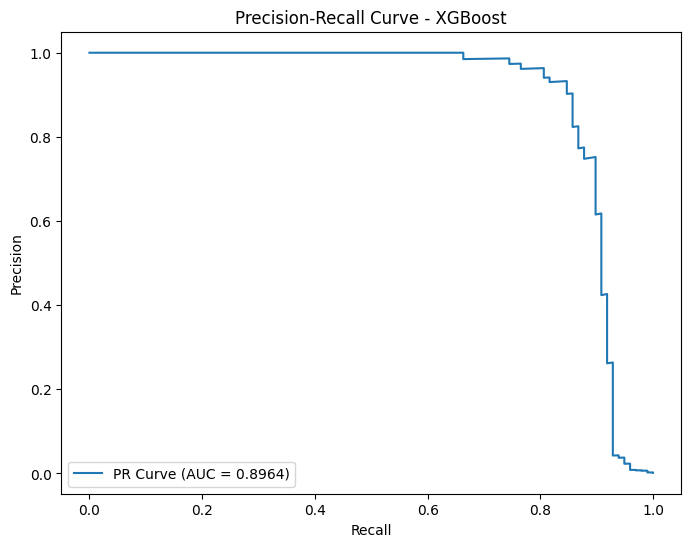

Optimal Threshold (Max F1-Score): 0.9976

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Model saved at: xgboost_model.pkl


,XGBoost
Accuracy,0.999596
ROC-AUC,0.984043
Precision,0.912088
Recall,0.846939
F1-Score,0.878307
Optimal Threshold,0.997589
True Negatives,56856.000000
False Positives,8.000000
False Negatives,15.000000
True Positives,83.000000


In [33]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)
evaluate_model(xgb_model, X_resampled, y_resampled, X_test, y_test, "XGBoost")

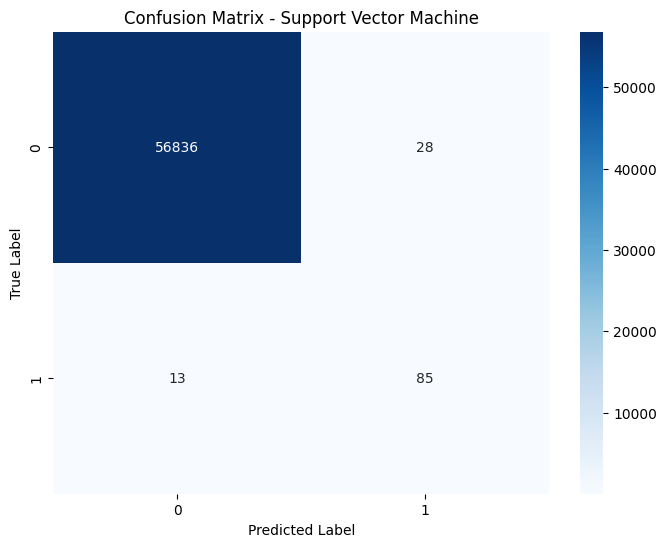

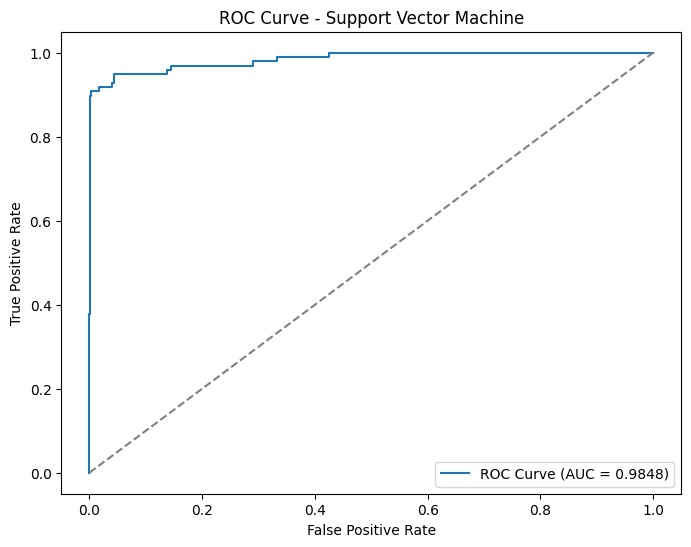

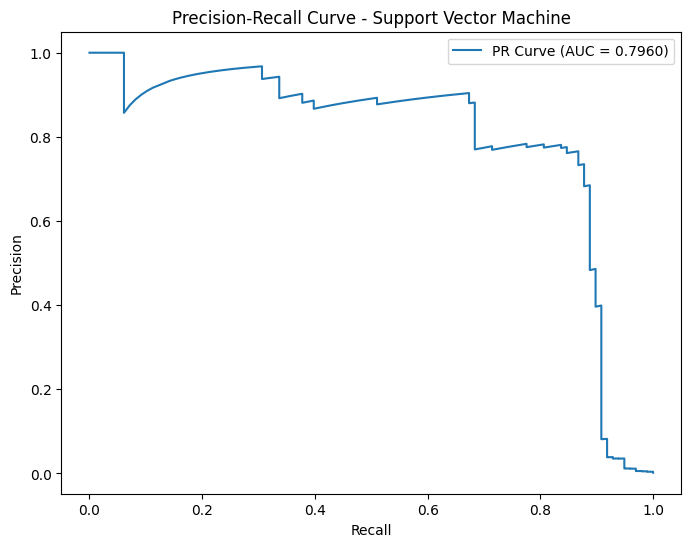

Optimal Threshold (Max F1-Score): 0.9945

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Model saved at: support_vector_machine_model.pkl


,Support Vector Machine
Accuracy,0.999280
ROC-AUC,0.984772
Precision,0.752212
Recall,0.867347
F1-Score,0.805687
Optimal Threshold,0.994470
True Negatives,56836.000000
False Positives,28.000000
False Negatives,13.000000
True Positives,85.000000


In [34]:
# Support Vector Machine
linear_svc = LinearSVC(max_iter=10000)
svm_model = CalibratedClassifierCV(base_estimator=linear_svc, cv=5)
evaluate_model(svm_model, X_resampled, y_resampled, X_test, y_test, "Support Vector Machine")

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


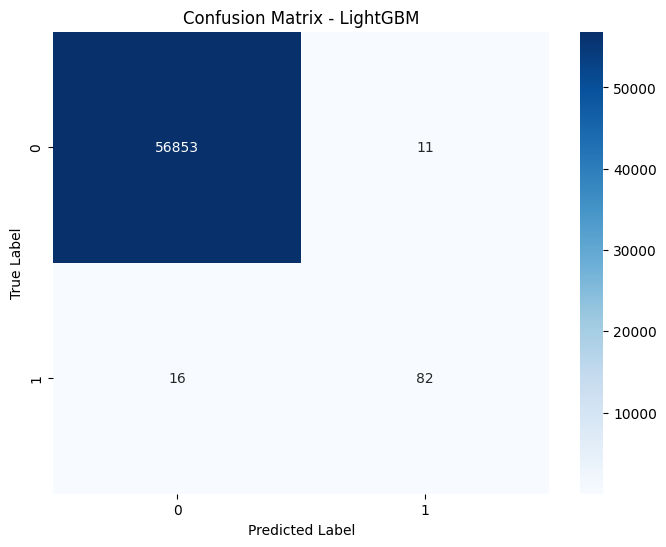

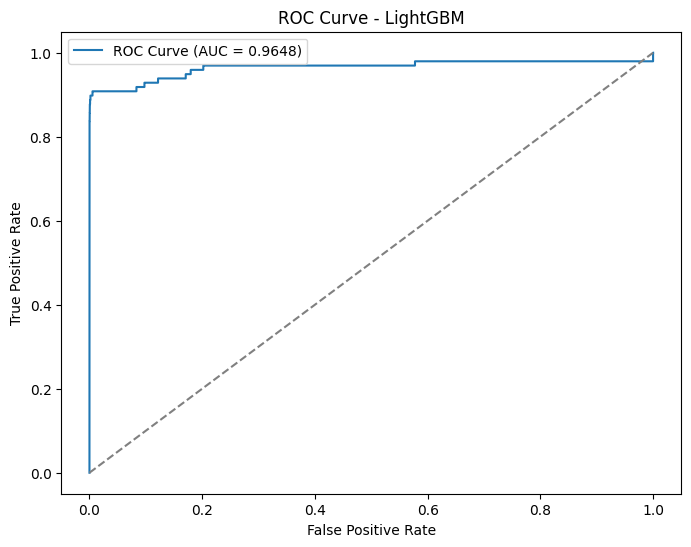

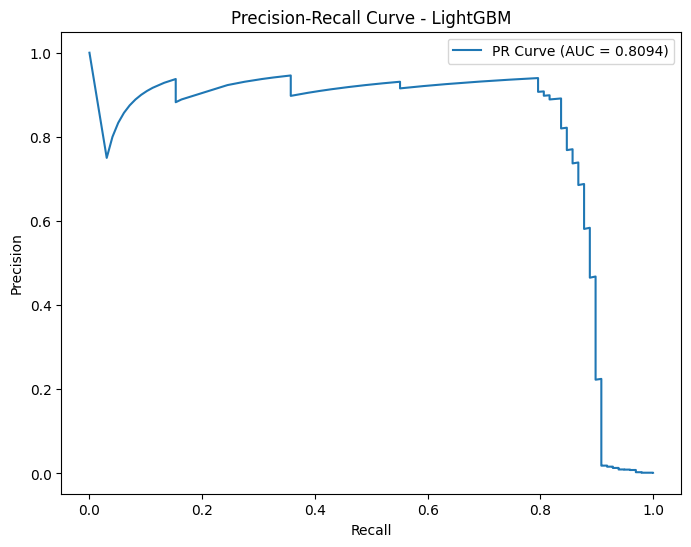

Optimal Threshold (Max F1-Score): 0.9935

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Model saved at: lightgbm_model.pkl


,LightGBM
Accuracy,0.999526
ROC-AUC,0.964819
Precision,0.881720
Recall,0.836735
F1-Score,0.858639
Optimal Threshold,0.993473
True Negatives,56853.000000
False Positives,11.000000
False Negatives,16.000000
True Positives,82.000000


In [35]:
# LightGBM
lgbm_model = LGBMClassifier(random_state=random_state)
evaluate_model(lgbm_model, X_resampled, y_resampled, X_test, y_test, "LightGBM")

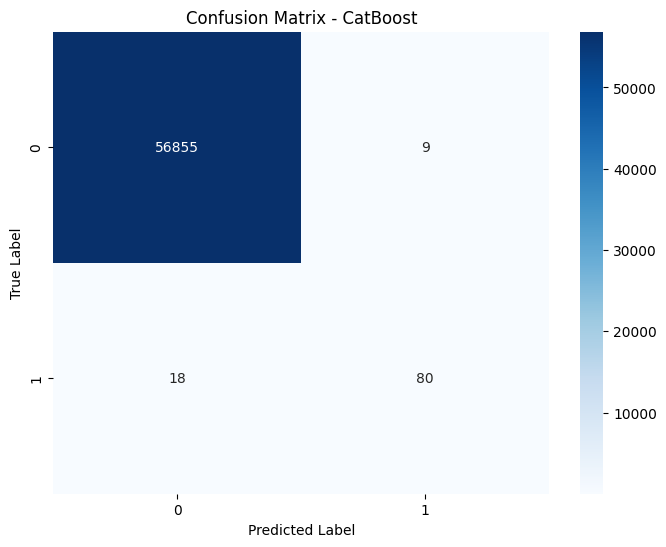

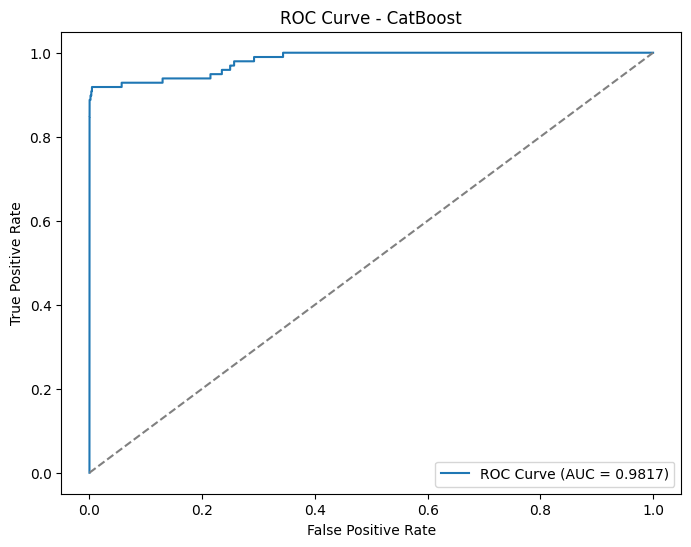

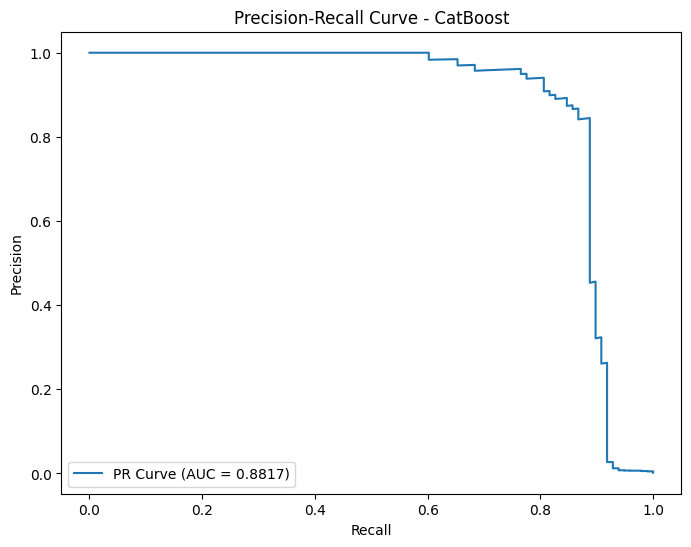

Optimal Threshold (Max F1-Score): 0.9572

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Model saved at: catboost_model.pkl


,CatBoost
Accuracy,0.999526
ROC-AUC,0.981731
Precision,0.898876
Recall,0.816327
F1-Score,0.855615
Optimal Threshold,0.957154
True Negatives,56855.000000
False Positives,9.000000
False Negatives,18.000000
True Positives,80.000000


In [36]:
# CatBoost
catboost_model = CatBoostClassifier(verbose=0, random_state=random_state)
evaluate_model(catboost_model, X_resampled, y_resampled, X_test, y_test, "CatBoost")

In [37]:
def compare_models(metrics_list):
    # Convert metrics to DataFrame
    metrics_df = pd.DataFrame(metrics_list)

    # Plot metrics comparison
    metrics_to_plot = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score']
    metrics_df.T[metrics_to_plot].plot(kind='bar', figsize=(12, 8))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    return metrics_df

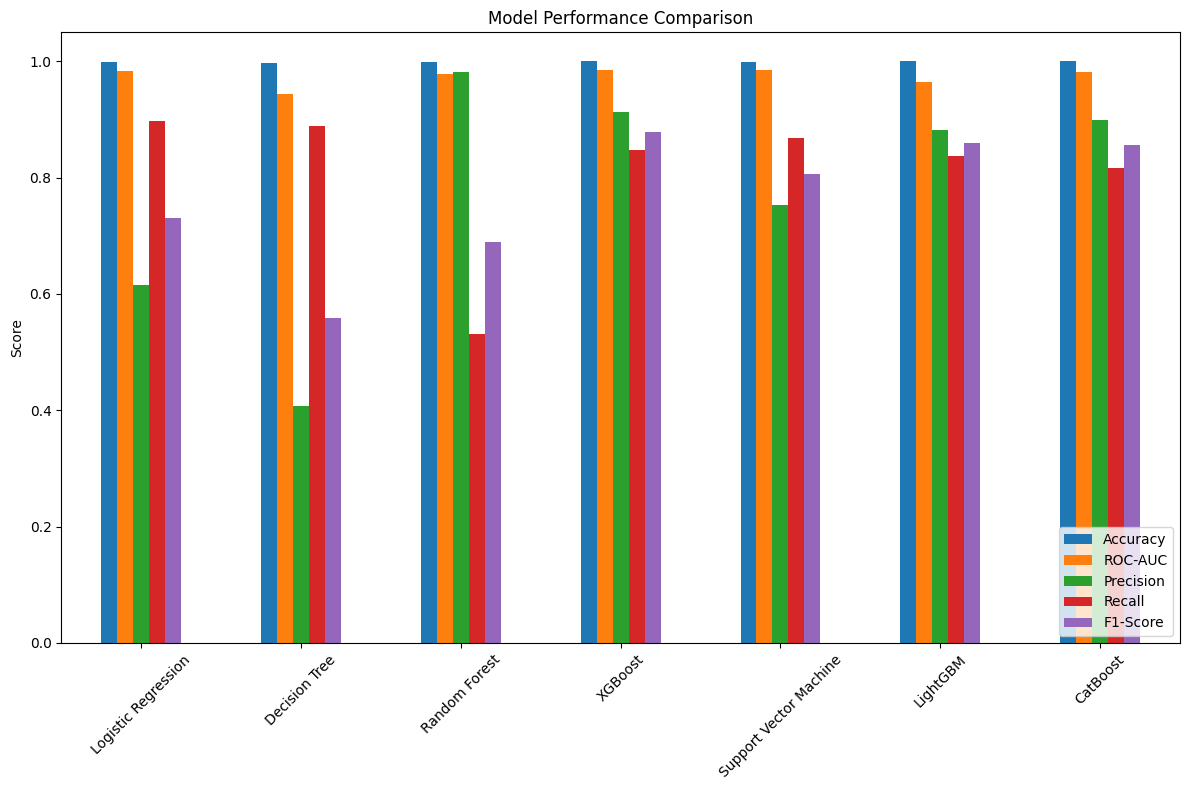

,Logistic Regression,Decision Tree,Random Forest,XGBoost,Support Vector Machine,LightGBM,CatBoost
Accuracy,0.998859,0.997577,0.999175,0.999596,0.999280,0.999526,0.999526
ROC-AUC,0.983626,0.942761,0.977802,0.984043,0.984772,0.964819,0.981731
Precision,0.615385,0.406542,0.981132,0.912088,0.752212,0.881720,0.898876
Recall,0.897959,0.887755,0.530612,0.846939,0.867347,0.836735,0.816327
F1-Score,0.730290,0.557692,0.688742,0.878307,0.805687,0.858639,0.855615
Optimal Threshold,1.000000,1.000000,0.750000,0.997589,0.994470,0.993473,0.957154
True Negatives,56809.000000,56737.000000,56863.000000,56856.000000,56836.000000,56853.000000,56855.000000
False Positives,55.000000,127.000000,1.000000,8.000000,28.000000,11.000000,9.000000
False Negatives,10.000000,11.000000,46.000000,15.000000,13.000000,16.000000,18.000000
True Positives,88.000000,87.000000,52.000000,83.000000,85.000000,82.000000,80.000000


In [38]:
result_df = compare_models(all_metrics)
result_df

In [39]:
# Find the best model based on Accuracy
metrics_df = result_df.T
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)


Best Model:
Accuracy                 0.999596
ROC-AUC                  0.984043
Precision                0.912088
Recall                   0.846939
F1-Score                 0.878307
Optimal Threshold        0.997589
True Negatives       56856.000000
False Positives          8.000000
False Negatives         15.000000
True Positives          83.000000
Name: XGBoost, dtype: float64
